In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
df_temp = pd.read_csv(r"data\temperature_data.csv")
df_temp.drop(columns = [df_temp.columns[0]], inplace=True)

In [3]:
df_temp

,date,Min Temp,Max Temp,Mean Temp
0,1951-01-01,2.680000,15.130000,8.905000
1,1951-01-02,3.030000,18.340000,10.685000
2,1951-01-03,2.910000,17.370001,10.140000
3,1951-01-04,3.170000,17.760000,10.465000
4,1951-01-05,3.650000,16.490000,10.070000
...,...,...,...,...
26658,2023-12-27,7.624851,18.110460,12.867656
26659,2023-12-28,7.640046,15.210753,11.425400
26660,2023-12-29,7.504602,15.522985,11.513794
26661,2023-12-30,7.527018,14.187593,10.857306


In [4]:
df_rain = pd.read_csv(r"data\rainfall_data.csv")
df_rain.drop(columns = [df_rain.columns[0]], inplace=True)

In [5]:
df_temp.rename(columns={'date': 'TIME'}, inplace=True)

In [6]:
df_merge = pd.merge(df_temp, df_rain, on='TIME')
df_merge

,TIME,Min Temp,Max Temp,Mean Temp,RAINFALL
0,1951-01-01,2.680000,15.130000,8.905000,0.0
1,1951-01-02,3.030000,18.340000,10.685000,0.0
2,1951-01-03,2.910000,17.370001,10.140000,0.0
3,1951-01-04,3.170000,17.760000,10.465000,0.0
4,1951-01-05,3.650000,16.490000,10.070000,0.0
...,...,...,...,...,...
26293,2022-12-27,5.252471,15.516814,10.384643,0.0
26294,2022-12-28,4.545312,17.423504,10.984408,0.0
26295,2022-12-29,5.690282,14.416164,10.053223,0.0
26296,2022-12-30,6.461596,15.595161,11.028379,0.0


In [7]:
df_merge['TIME'] = pd.to_datetime(df_merge['TIME'])
df_merge['year_month'] = df_merge['TIME'].dt.to_period('M')
monthly_data = df_merge.drop(columns=['TIME'])
monthly_data = monthly_data.groupby('year_month').mean()
df_merge.drop(columns=['year_month'], inplace=True)
print(monthly_data)

             Min Temp   Max Temp  Mean Temp   RAINFALL
year_month                                            
1951-01      3.967419  15.801935   9.884677   1.495463
1951-02      5.838214  19.208929  12.523571   0.647581
1951-03     10.764839  23.542581  17.153710   2.439290
1951-04     13.592667  26.587000  20.089833   0.139405
1951-05     19.187097  32.264839  25.725968   1.566789
...               ...        ...        ...        ...
2022-08     21.716387  28.869290  25.292838  13.266669
2022-09     20.038050  27.607955  23.823002  11.473897
2022-10     15.340149  25.500540  20.420344   3.875470
2022-11     10.477897  22.618728  16.548313   0.000000
2022-12      6.743360  18.606269  12.674815   0.000000

[864 rows x 4 columns]


In [20]:
df_merge['year'] = df_merge['TIME'].dt.to_period('Y')
yearly_data = df_merge.drop(columns=['TIME'])
yearly_data = yearly_data.groupby('year').mean()
df_merge.drop(columns=['year'], inplace=True)
print(yearly_data)

       Min Temp   Max Temp  Mean Temp  RAINFALL
year                                           
1951  14.310137  25.828137  20.069137  4.010587
1952  14.381284  25.828388  20.104836  4.623981
1953  14.853123  25.930548  20.391836  4.778490
1954  14.385726  25.159151  19.772438  5.834388
1955  14.112247  25.138329  19.625288  5.474035
...         ...        ...        ...       ...
2018  14.271693  25.934227  20.102960  5.519811
2019  14.263684  24.403127  19.333405  4.108388
2020  14.057682  24.611245  19.334464  1.116805
2021  14.558620  25.328709  19.943665  5.285882
2022  15.151315  25.707047  20.429181  4.746849

[72 rows x 4 columns]


In [21]:
yearly_data.index = yearly_data.index.year

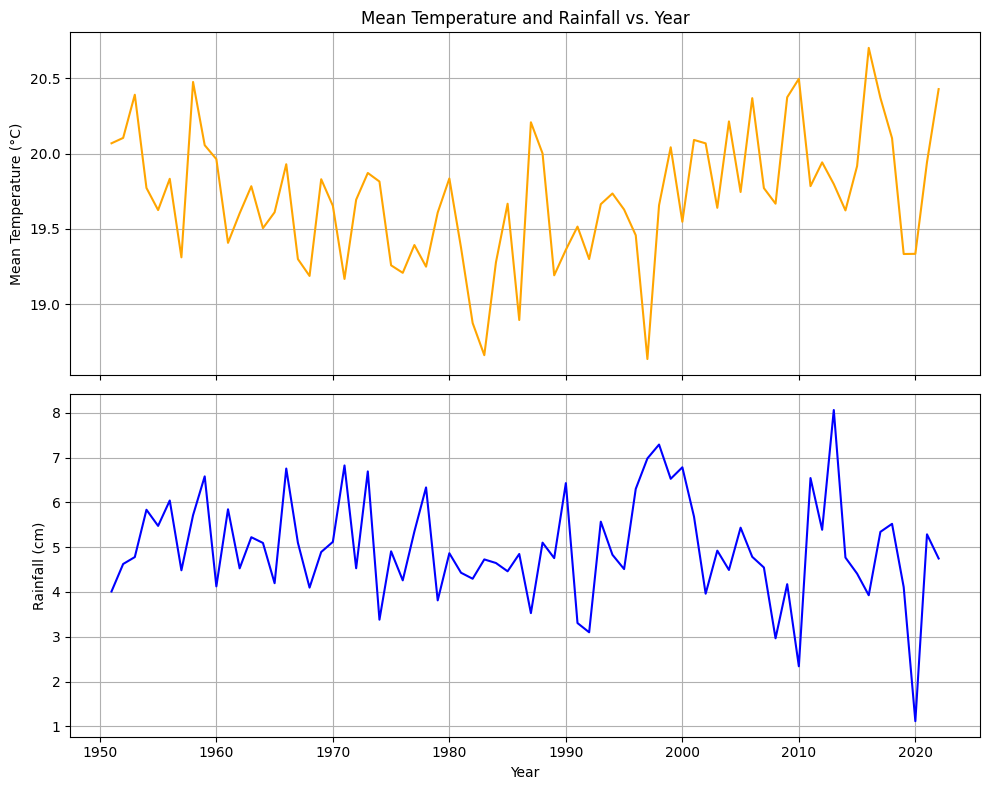

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Line plot for Mean Temp
ax[0].plot(yearly_data.index, yearly_data['Mean Temp'], color='orange', linestyle='-')
ax[0].set_ylabel('Mean Temperature (°C)')
ax[0].set_title('Mean Temperature and Rainfall vs. Year')
ax[0].grid(True)

# Line plot for Rainfall
ax[1].plot(yearly_data.index, yearly_data['RAINFALL'], color='blue', linestyle='-')
ax[1].set_ylabel('Rainfall (cm)')
ax[1].set_xlabel('Year')
ax[1].grid(True)

plt.tight_layout()
plt.show()

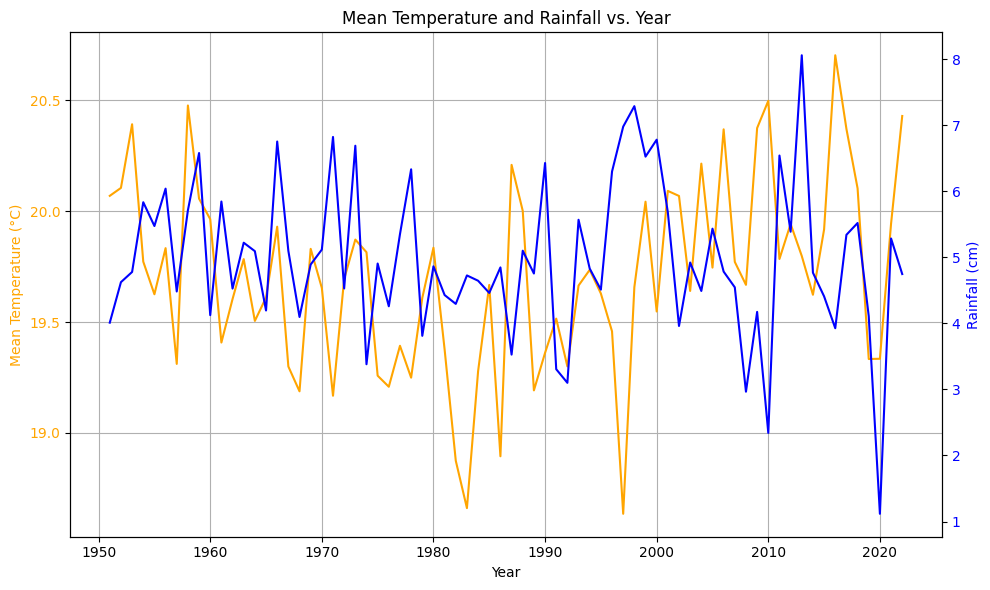

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(yearly_data.index, yearly_data['Mean Temp'], color='orange', linestyle='-', label='Mean Temperature')
ax1.set_ylabel('Mean Temperature (°C)', color='orange')
ax1.set_xlabel('Year')
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['RAINFALL'], color='blue', linestyle='-', label='Rainfall')
ax2.set_ylabel('Rainfall (cm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Mean Temperature and Rainfall vs. Year')
fig.tight_layout()
plt.show()

In [28]:
from scipy.stats import linregress
import pymannkendall as mk

In [45]:
yearly_data['Decade'] = (yearly_data.index // 10)*10
decade_results = {}

for decade, data in yearly_data.groupby('Decade'):
    start,end = data.index.min(), data.index.max()
    x_values = np.arange(start, end+1)
    temp_slope, temp_intercept = linregress(data.index, data['Mean Temp'])[0:2]
    rain_slope, rain_intercept = linregress(data.index, data['RAINFALL'])[0:2]
    temp_mk_test = mk.original_test(data['Mean Temp'])
    rain_mk_test = mk.original_test(data['RAINFALL'])

    decade_results[decade] = {
        'temp_slope': temp_slope,
        'temp_intercept': temp_intercept,
        'rain_slope': rain_slope,
        'rain_intercept': rain_intercept,
        'temp_mk_test': temp_mk_test,
        'rain_mk_test': rain_mk_test,
        'x_values': x_values
    }

full_temp_slope, full_temp_intercept = linregress(yearly_data.index, yearly_data['Mean Temp'])[0:2]
full_rain_slope, full_rain_intercept = linregress(yearly_data.index, yearly_data['RAINFALL'])[0:2]
x_values_full = np.arange(yearly_data.index.min(), yearly_data.index.max()+1)

full_temp_mk_test = mk.original_test(yearly_data['Mean Temp'])
full_rain_mk_test = mk.original_test(yearly_data['RAINFALL'])

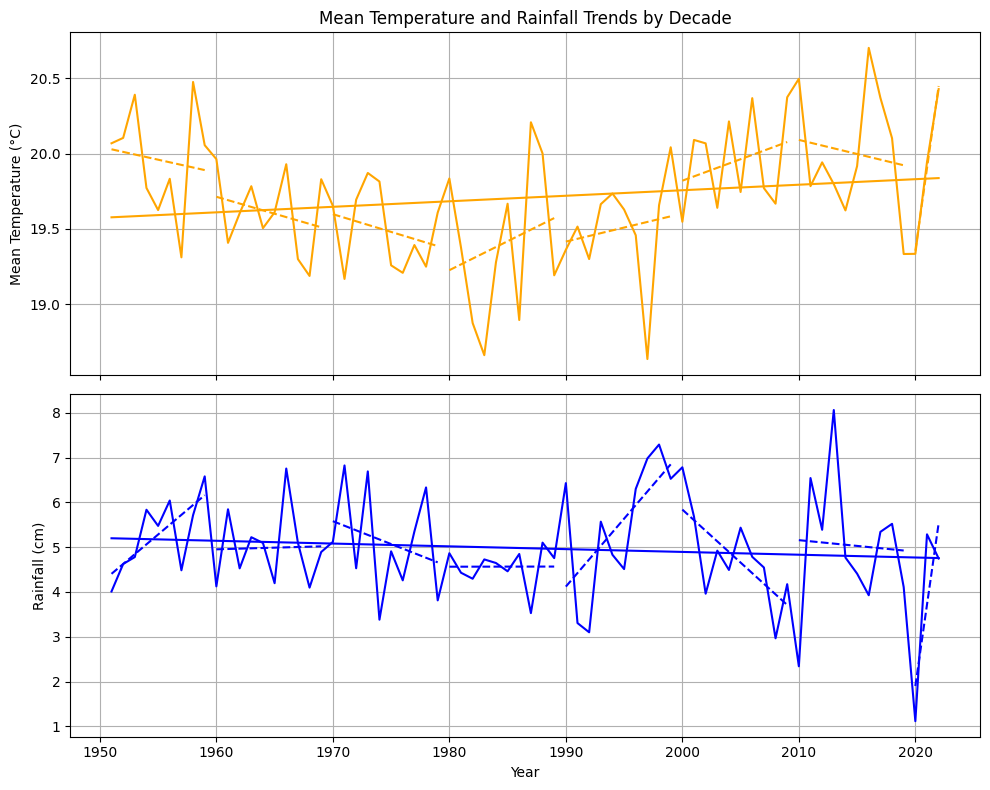

Mann-Kendall Test Results:
Full period Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.1233130559725113, z=1.5410153260700912, Tau=0.12441314553990611, s=318.0, var_s=42316.0, slope=0.0035813445081494906, intercept=19.55383907245407)
Full period Rainfall trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.42813722853210345, z=-0.7923832749193214, Tau=-0.06416275430359937, s=-164.0, var_s=42316.0, slope=-0.00441751547745475, intercept=4.995366570555511)
1950s Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.7544541774940892, z=-0.3127716210856122, Tau=-0.1111111111111111, s=-4.0, var_s=92.0, slope=-0.027062731432933414, intercept=20.16462078299726)
1950s Rainfall trend: Mann_Kendall_Test(trend='increasing', h=True, p=0.04760395472787149, z=1.9808869335422103, Tau=0.5555555555555556, s=20.0, var_s=92.0, slope=0.2778324947679198, intercept=4.362704528174371)
1960s Temperature trend: Mann_Kendall_Test(trend='no trend', h=False, p=0.591505036994916

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(yearly_data.index, yearly_data['Mean Temp'], color='orange', linestyle='-', label='Mean Temperature')
ax[0].set_ylabel('Mean Temperature (°C)')
ax[0].set_title('Mean Temperature and Rainfall Trends by Decade')
ax[0].grid(True)

for decade, results in decade_results.items():
    temp_y_values = results['temp_slope'] * results['x_values'] + results['temp_intercept']
    ax[0].plot(results['x_values'], temp_y_values, color='orange', linestyle='--', label=f'{decade}s Temp Trend')

full_temp_y_values = full_temp_slope * x_values_full + full_temp_intercept
ax[0].plot(x_values_full, full_temp_y_values, color='orange', linestyle='-', linewidth=1.5, label='Overall Temp Trend')

ax[1].plot(yearly_data.index, yearly_data['RAINFALL'], color='blue', linestyle='-', label='Rainfall')
ax[1].set_ylabel('Rainfall (cm)')
ax[1].set_xlabel('Year')
ax[1].grid(True)

for decade, results in decade_results.items():
    rain_y_values = results['rain_slope'] * results['x_values'] + results['rain_intercept']
    ax[1].plot(results['x_values'], rain_y_values, color='blue', linestyle='--', label=f'{decade}s Rain Trend')

full_rain_y_values = full_rain_slope * x_values_full + full_rain_intercept
ax[1].plot(x_values_full, full_rain_y_values, color='blue', linestyle='-', linewidth=1.5, label='Overall Rain Trend')

plt.tight_layout()
plt.show()

print("Mann-Kendall Test Results:")
print(f"Full period Temperature trend: {full_temp_mk_test}")
print(f"Full period Rainfall trend: {full_rain_mk_test}")
for decade, results in decade_results.items():
    print(f"{decade}s Temperature trend: {results['temp_mk_test']}")
    print(f"{decade}s Rainfall trend: {results['rain_mk_test']}")